In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from modules.file import CPandasFile

In [3]:
pandas_secretary = CPandasFile()


1. Đọc dữ liệu

In [4]:
items = pandas_secretary.readExcel(r'./data/ItemList.xlsx')

items

,sausage,whole milk,semi-finished bread,yogurt,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,frankfurter,curd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14957,tropical fruit,berries,other vegetables,yogurt,kitchen towels,napkins,NaN,NaN,NaN,NaN,NaN
14958,bottled water,herbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14959,fruit/vegetable juice,onions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14960,soda,root vegetables,semi-finished bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
items.shape

(14962, 11)

2. Chuẩn hóa dữ liệu và build model

In [6]:
records = []

for i in range(0, items.shape[0]):
    records.append([str(items.values[i, j]) for j in range(0, items.shape[1])])

In [7]:
from modules.apriori import CApriori

In [8]:
apriori_model = CApriori(records)
df = apriori_model.initModel(0.01)

In [9]:
df

,support
itemsets,
(UHT-milk),0.021388
(beef),0.033953
(berries),0.021789
(beverages),0.016575
(bottled beer),0.045315
...,...
"(rolls/buns, other vegetables)",0.010560
"(whole milk, other vegetables)",0.014838
"(rolls/buns, whole milk)",0.013969


> **Nhận xét**
> * Các mặt hàng, kết hợp trên có nhiều hơn 1% đơn hàng trên tổng số các đơn hàng

In [10]:
apriori_model.associationInfo('confidence', 0.02)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.110012,0.122109,0.010560,0.095990,0.786101,-0.002873,0.971108
1,(other vegetables),(rolls/buns),0.122109,0.110012,0.010560,0.086481,0.786101,-0.002873,0.974241
2,(whole milk),(other vegetables),0.157867,0.122109,0.014838,0.093988,0.769705,-0.004439,0.968962
3,(other vegetables),(whole milk),0.122109,0.157867,0.014838,0.121511,0.769705,-0.004439,0.958615
4,(rolls/buns),(whole milk),0.110012,0.157867,0.013969,0.126974,0.804315,-0.003399,0.964615
5,(whole milk),(rolls/buns),0.157867,0.110012,0.013969,0.088484,0.804315,-0.003399,0.976383
6,(soda),(whole milk),0.097113,0.157867,0.011629,0.119752,0.758566,-0.003701,0.956700
7,(whole milk),(soda),0.157867,0.097113,0.011629,0.073666,0.758566,-0.003701,0.974689
8,(whole milk),(yogurt),0.157867,0.085817,0.011095,0.070279,0.818941,-0.002453,0.983287
9,(yogurt),(whole milk),0.085817,0.157867,0.011095,0.129283,0.818941,-0.002453,0.967173


> **Nhận xét**
> * Các **consequents** trên lớn hơn 2% khả năng sẽ dc mua nếu **antecedents** dc mua

In [13]:
rules = apriori_model.associationInfo('lift', 0.02)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.110012,0.122109,0.010560,0.095990,0.786101,-0.002873,0.971108
1,(other vegetables),(rolls/buns),0.122109,0.110012,0.010560,0.086481,0.786101,-0.002873,0.974241
2,(whole milk),(other vegetables),0.157867,0.122109,0.014838,0.093988,0.769705,-0.004439,0.968962
3,(other vegetables),(whole milk),0.122109,0.157867,0.014838,0.121511,0.769705,-0.004439,0.958615
4,(rolls/buns),(whole milk),0.110012,0.157867,0.013969,0.126974,0.804315,-0.003399,0.964615
5,(whole milk),(rolls/buns),0.157867,0.110012,0.013969,0.088484,0.804315,-0.003399,0.976383
6,(soda),(whole milk),0.097113,0.157867,0.011629,0.119752,0.758566,-0.003701,0.956700
7,(whole milk),(soda),0.157867,0.097113,0.011629,0.073666,0.758566,-0.003701,0.974689
8,(whole milk),(yogurt),0.157867,0.085817,0.011095,0.070279,0.818941,-0.002453,0.983287
9,(yogurt),(whole milk),0.085817,0.157867,0.011095,0.129283,0.818941,-0.002453,0.967173


> **Nhận xét**
> * Nhìn chung, các **consequents** và **antecedents** đều có giá trị lift tiến về  1, chứng tỏ chúng có khả năng rất cao sẽ dc mua cùng nhau.

3. Kiểm tra có `sausage` ko

In [16]:
for row in rules.iterrows():
    if "sausage" in row[1][0]:
        print(row)

> **Nhận xét**
> * Ko có `sausage` trong các luật kết hợp

4. Tìm 15 sản phẩm bán nhiều nhất

In [18]:
result = apriori_model.transactions.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14902,14642,14940,14933,14959,14958,14841,14945,14454,14636,...,14882,14911,14685,14308,14954,14603,14787,12600,13678,14902
True,60,320,22,29,3,4,121,17,508,326,...,80,51,277,654,8,359,175,2362,1284,60


In [23]:
df_true = result.iloc[1,:]
x = df_true.sort_values(ascending=False)

fifteen_products = x[:15]
fifteen_products

whole milk          2362
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1284
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              902
citrus fruit         795
pastry               774
pip fruit            734
shopping bags        712
canned beer          702
bottled beer         678
Name: True, dtype: int64

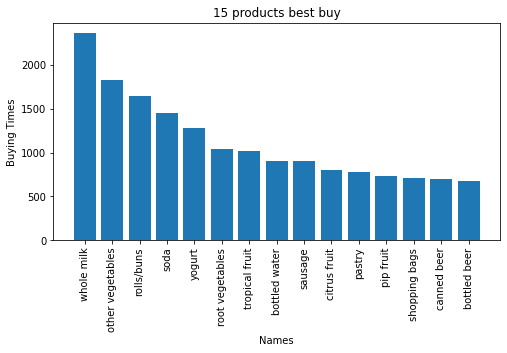

In [24]:
import matplotlib.pyplot as plt

pos = np.arange(len(fifteen_products.values))
plt.figure(figsize=(8,4))
plt.bar(pos, fifteen_products.values, align='center')
plt.xticks(pos, fifteen_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('15 products best buy')

plt.show()

5. 15 sản phẩm bán ế nhất

In [25]:
fifteen_products = x[-15:]
fifteen_products

specialty vegetables     11
organic products         10
decalcifier               9
hair spray                9
liqueur                   9
whisky                    8
salad dressing            6
make up remover           5
toilet cleaner            5
frozen chicken            5
rubbing alcohol           5
bags                      4
baby cosmetics            3
kitchen utensil           1
preservation products     1
Name: True, dtype: int64

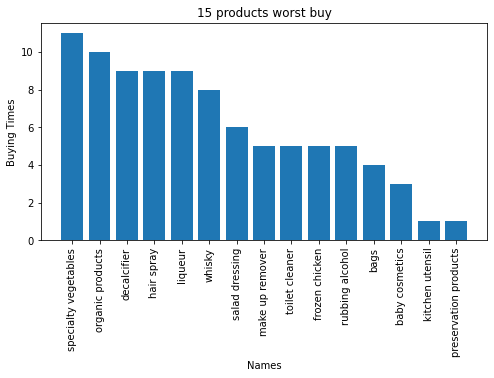

In [26]:
pos = np.arange(len(fifteen_products.values))
plt.figure(figsize=(8,4))
plt.bar(pos, fifteen_products.values, align='center')
plt.xticks(pos, fifteen_products.keys(), rotation='vertical')
plt.ylabel('Buying Times')
plt.xlabel('Names')
plt.title('15 products worst buy')

plt.show()